In [2]:
import pandas as pd

In [3]:
#read in dataset
arrest_data = pd.read_csv("arrest-data.csv")

In [4]:
#drop columns that are not relevant to this analysis
arrest_data = arrest_data.drop(columns = ["PK","CCR","INCIDENTZONE","INCIDENTTRACT","COUNCIL_DISTRICT","PUBLIC_WORKS_DIVISION","X","Y"])

In [5]:
#view data we are working with
arrest_data.head()
#arrest_data.size
#list(arrest_data["OFFENSES"].unique())

,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD
0,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield
1,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City
2,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood
3,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny
4,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights


In [16]:
by_neighborhood = (arrest_data.drop(columns=["AGE","GENDER","RACE","ARRESTTIME","ARRESTLOCATION","OFFENSES","INCIDENTLOCATION"]))

In [25]:
counts = by_neighborhood.value_counts()
counts[0]

3570

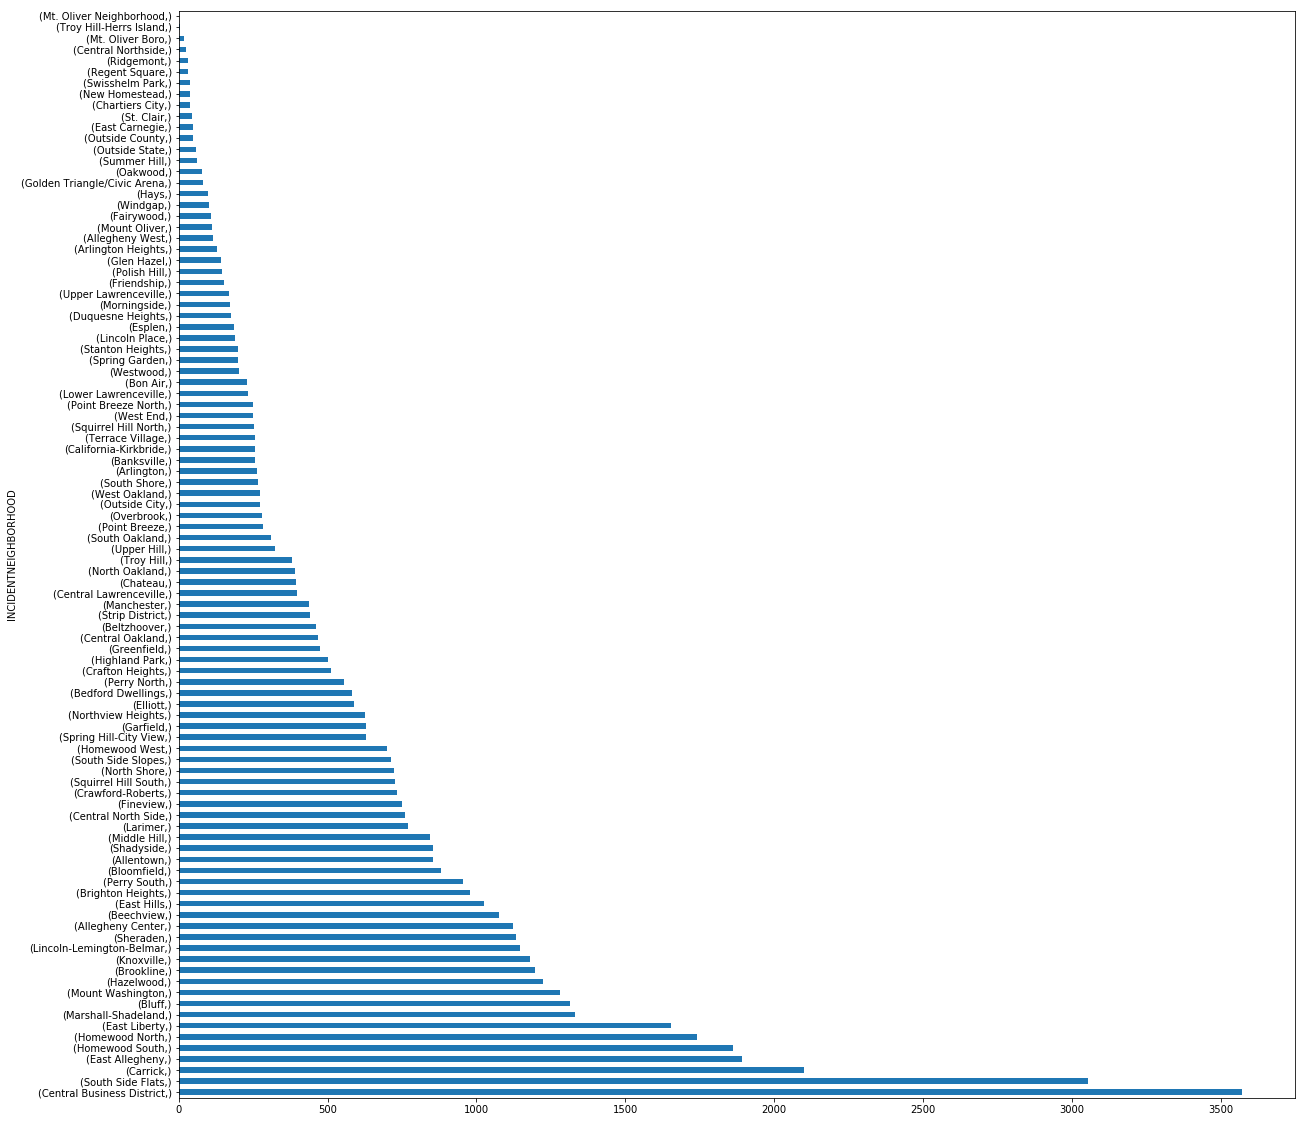

In [28]:
counts.plot(kind = "barh", y = counts, figsize = (20,20))

In [11]:
other_data = pd.read_csv("https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4")

In [12]:
new_data = other_data.drop(columns = ["address", "other_count", "pistol_count", "revolver_count", "rifle_count", "shotgun_count", "month", "council_district", "ward", "tract", "public_works_division", "police_zone", "fire_zone", "latitude", "longitude", "dow", "year"])

In [13]:
new_data.head()

,total_count,neighborhood
0,2,Mount Oliver Borough
1,1,Sheraden
2,1,Terrace Village
3,1,Brighton Heights
4,1,NaN


In [14]:
gun_group = new_data.groupby(["neighborhood"])

In [17]:
total_seizures = gun_group.sum()

In [24]:
total_seizures = total_seizures.sort_values(by=["total_count"])

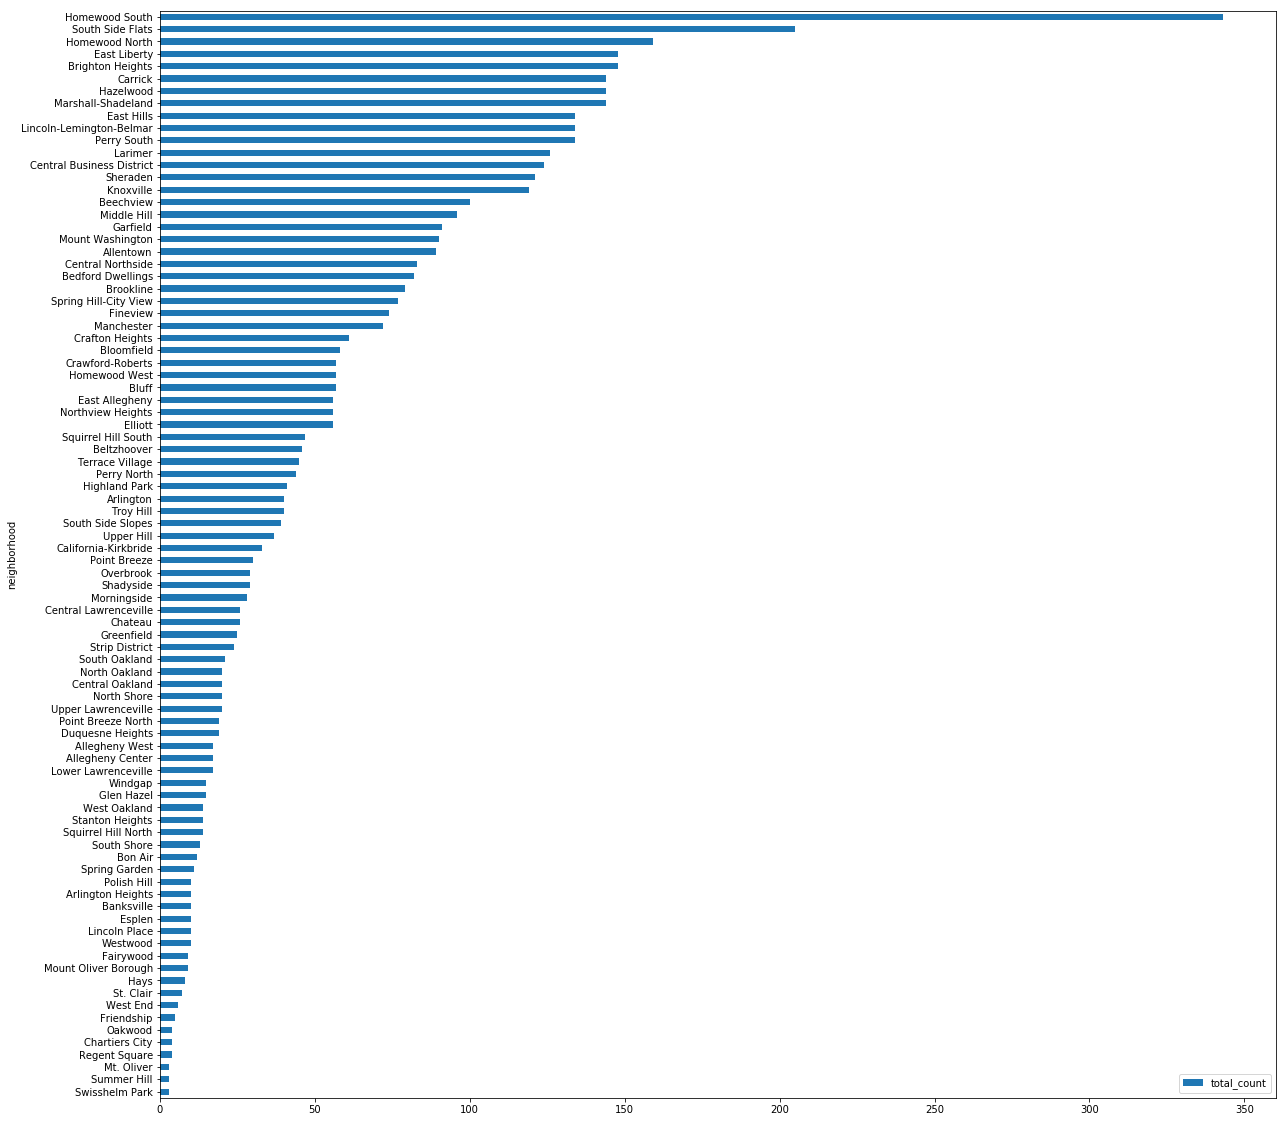

In [25]:
total_seizures.plot(kind = "barh", y = "total_count", figsize = (20,20))